# Linear Regression with Eager API

A linear regression implemented using TensorFlow's Eager API.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import absolute_import, division, print_function

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
# Training Data
train_X = [
    3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791,
    5.313, 7.997, 5.654, 9.27, 3.1
]
train_Y = [
    1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827,
    3.465, 1.65, 2.904, 2.42, 2.94, 1.3
]
n_samples = len(train_X)

In [5]:
n_samples

17

In [6]:
# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [7]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

In [8]:
# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

In [9]:
# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [10]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

In [11]:
# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

In [12]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

Initial cost= 0.690083742 W= 0.2195842 b= -0.10639799


In [13]:
# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

Epoch: 0001 cost= 0.294964164 W= 0.29016185 b= -0.09534955
Epoch: 0100 cost= 0.114791863 W= 0.36195317 b= 0.016694564
Epoch: 0200 cost= 0.106626317 W= 0.34933603 b= 0.10614448
Epoch: 0300 cost= 0.100221738 W= 0.33816192 b= 0.18536395
Epoch: 0400 cost= 0.095198393 W= 0.32826576 b= 0.2555231
Epoch: 0500 cost= 0.091258354 W= 0.31950146 b= 0.317658
Epoch: 0600 cost= 0.088168055 W= 0.31173956 b= 0.3726865
Epoch: 0700 cost= 0.085744217 W= 0.3048654 b= 0.42142132
Epoch: 0800 cost= 0.083843090 W= 0.2987774 b= 0.4645824
Epoch: 0900 cost= 0.082351960 W= 0.2933857 b= 0.502807
Epoch: 1000 cost= 0.081182405 W= 0.28861067 b= 0.53665996


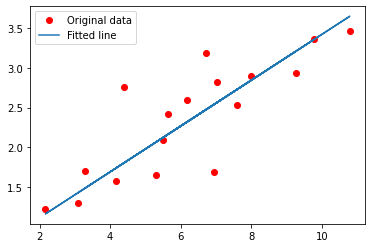

In [14]:
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()